# Instructions

In [1]:
#
# BEFORE RUNNING
#
# Preprocess data in a terminal from this directory using
#
# $ python ./process-data.py
#
# Note: This script may take several hours on a modern computing device.
#

# Imports

In [21]:
%matplotlib inline

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../")

import game_utils


# Performance by Group Size

## Config

In [3]:
data_dir = '../../data/experiment3/'

## Load Data

In [4]:
games = []
games += game_utils.get_games(data_dir, 'experiment')

data = game_utils.get_data(data_dir, games)

#
# only one game had six players
#
data = data[data['active_n_players'] < 6]

data.rename(columns={'difficulty': 'Noise Level'}, inplace=True)
data["Noise Level"].replace({'1en01':'Low', '2en01':'High'}, inplace=True)


72 participants were dropped for inactivity
6 participants were ignored for disconnecting early


In [22]:
with pd.option_context('display.max_rows', None):
    print(data.groupby('game')['score'].mean())

game
2015-01-25-11-32-5-407_8_3-2en01_745098564075                                  0.665667
2015-01-25-11-41-40-481_8_2-2en01_816255721962                                 0.668396
2015-01-25-11-46-41-665_8_3-2en01_790439564036                                 0.525417
2015-01-25-11-56-54-310_8_3-2en01_745747129898                                 0.841486
2015-01-25-12-12-41-492_8_2-2en01_364310212666                                 0.625672
2015-01-25-12-2-14-79_8_2-2en01_710215174360                                   0.668040
2015-01-25-12-37-13-890_8_3-2en01_117019667057                                 0.685861
2015-01-25-17-35-52-592_8_3-2en01_791332189692                                 0.597391
2015-01-25-17-45-7-823_2_2-2en01_136029488407                                  0.643538
2015-01-25-17-47-29-191_4_1-2en01_25809311075                                  0.652252
2015-01-25-17-51-59-196_4_1-2en01_916630183113                                 0.529958
2015-01-25-18-0-38-117_8_1-

In [36]:
data.groupby(['active_n_players','Noise Level'])['score'].count()/data.groupby(['active_n_players','Noise Level'])['active_n_players'].mean()

active_n_players  Noise Level
1                 High           82.0
                  Low            36.0
2                 High           33.0
                  Low            13.0
3                 High           20.0
                  Low             7.0
4                 High           15.0
                  Low             5.0
5                 High           10.0
                  Low             2.0
dtype: float64

In [17]:
data[data['active_n_players'] == 5].groupby('game')['score'].mean()

game
2015-01-25-18-46-55-823_8_3-2en01_895010825479    0.683453
2015-01-26-12-28-36-889_8_0-2en01_546892127487    0.675016
2015-01-26-18-27-37-42_8_2-2en01_390403241617     0.623867
2015-01-26-22-42-58-788_5_0-2en01_297649328364    0.622038
2015-01-26-23-19-26-925_5_1-2en01_623635699972    0.773388
2015-01-26-23-34-56-205_5_1-2en01_267702728742    0.752203
2015-01-27-0-2-30-523_5_2-2en01_712782695656      0.670440
2015-01-27-19-58-35-829_5_1-2en01_928616378689    0.725703
2015-01-27-20-38-41-696_5_1-2en01_33187873661     0.697958
2015-01-28-1-18-6-636_6_0-2en01_284161255462      0.552788
2015-01-29-22-9-14-654_5_0-1en01_69139042636      0.791036
2015-01-30-11-35-13-145_5_3-1en01_233730632113    0.848051
Name: score, dtype: float64

In [12]:
len(set(data[(data['active_n_players'] == 5) & (data['Noise Level'] == 'Low')]['game']))

2

In [25]:
np.mean(data['Noise Level'] == 'High')

0.7378190255220418

## Plot Performance

<Figure size 432x288 with 0 Axes>

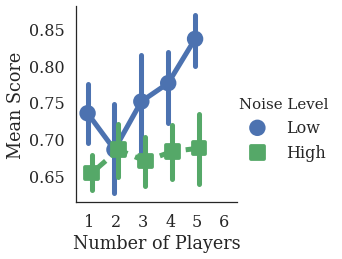

In [15]:

sns.set(font = "serif", context = "poster", style = "white")
sns.despine()       

sns.factorplot("active_n_players", "second_half_score", hue = "Noise Level", markers = ["o", "s"], linestyles = ["-","--"], data = data, kind="point", dodge = 0.15, units = "game", order = [1,2,3,4,5,6])

plt.xlabel('Number of Players')
plt.ylabel('Mean Score')

plt.savefig('../../plots/performance-summary.pdf')
    

# State Analysis

## Plot State Frequency by Score

In [19]:
def state_analysis(score, states, subset, group_size):
    sns.set(font = "serif", context = "poster", style = "white")

    fig, ax = plt.subplots()
    #plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)                                                                                                                   
    #ax.set_color_cycle(['b', 'g', 'y'])                                                                                                                                     
    #mpl.rc('font',family='Times New Roman')

    from seaborn import color_palette

    with color_palette("colorblind"):
        for s in states:
            plt.plot(score,states[s],label = s, lw = 10)
    #mpl.rc('font',family='Times New Roman')
    plt.xlabel('Score', fontsize=50)
    plt.ylabel('Probability', fontsize=50)
    if subset == '1en01':
        noise_level = "Low"
    elif subset == '2en01':
        noise_level = "High"
    plt.title('Noise Level: ' + noise_level + ', Group Size: ' + str(group_size), fontsize = 30)
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.legend(loc='upper left')
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='40')
    ax.tick_params(axis='x', labelsize=40)
    ax.tick_params(axis='y', labelsize=40)


    fig = plt.gcf()
    fig.set_size_inches(12.5,12.5)
    fig.savefig('../../plots/states-'+subset+'-'+str(group_size)+'.pdf')#,dpi=100)   


## Low Noise

In [46]:
in_dir = '../../processed/'
state_df = []
for subset in ['1en01','2en01']:
    for n in range(2,6):
        score, states = game_utils.get_state_scores(in_dir, subset, n)
        for i in range(len(score)):
            for s in ['exploring', 'exploiting', 'copying']:
                state_df += [[subset, n, s, score[i], states[s][i]]]


states as a function of score

states as a function of score

states as a function of score

states as a function of score

states as a function of score

states as a function of score

states as a function of score

states as a function of score


In [64]:
state_df = pd.DataFrame(state_df)
state_df.columns = ['Noise Level', 'Num Players', 'State', 'Score', 'Proportion']

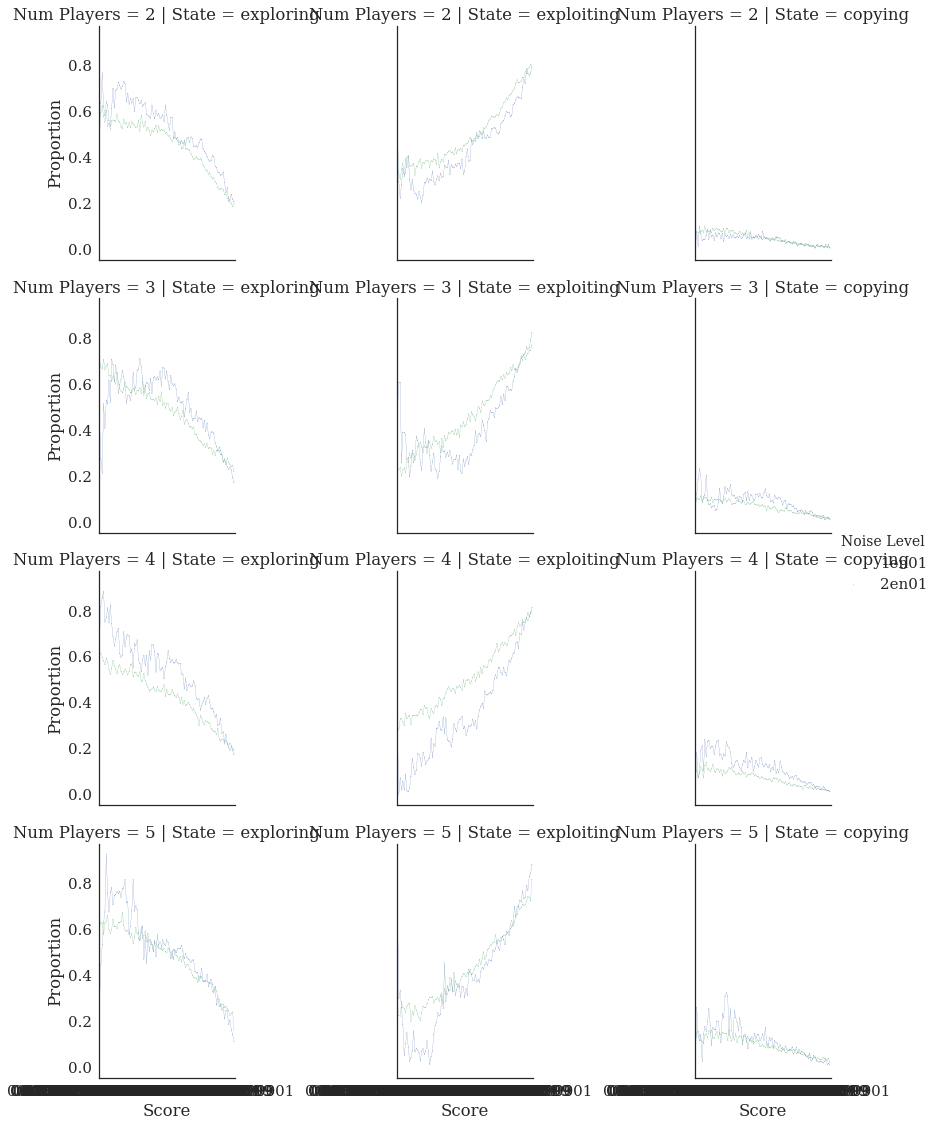

In [66]:
#sns.set(font = "serif", context = "poster", style = "white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.1})

sns.factorplot('Score', 'Proportion', hue = 'Noise Level', col = 'State', row = 'Num Players', kind = 'point', data = state_df)

In [37]:
in_dir = '../../processed/'
subset = '1en01'


states as a function of score

states as a function of score

states as a function of score

states as a function of score


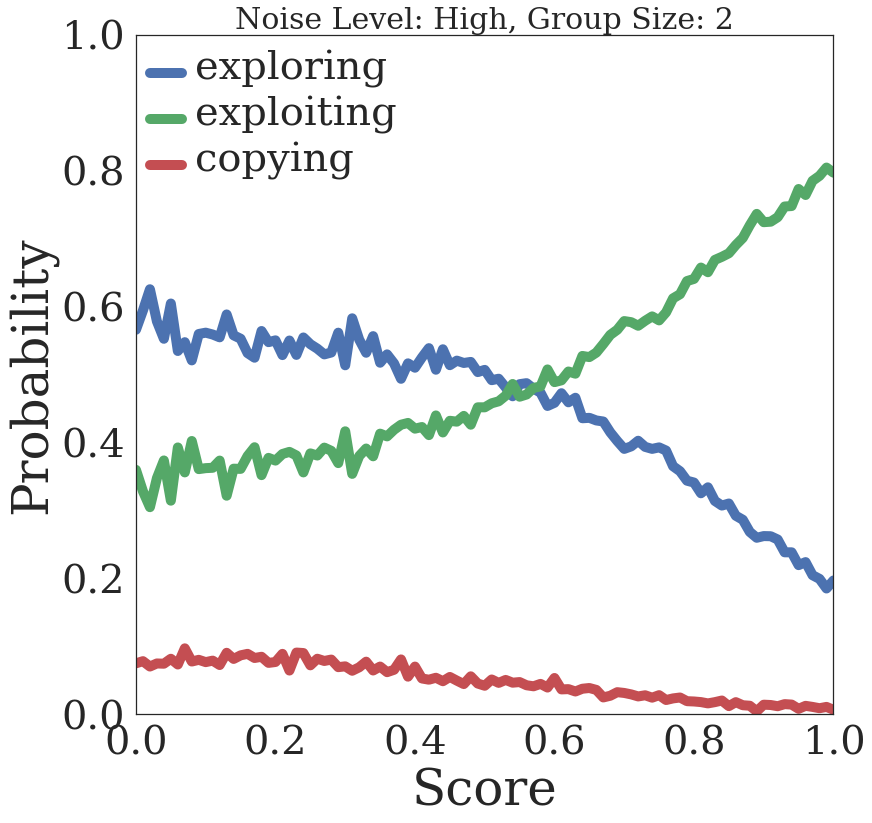

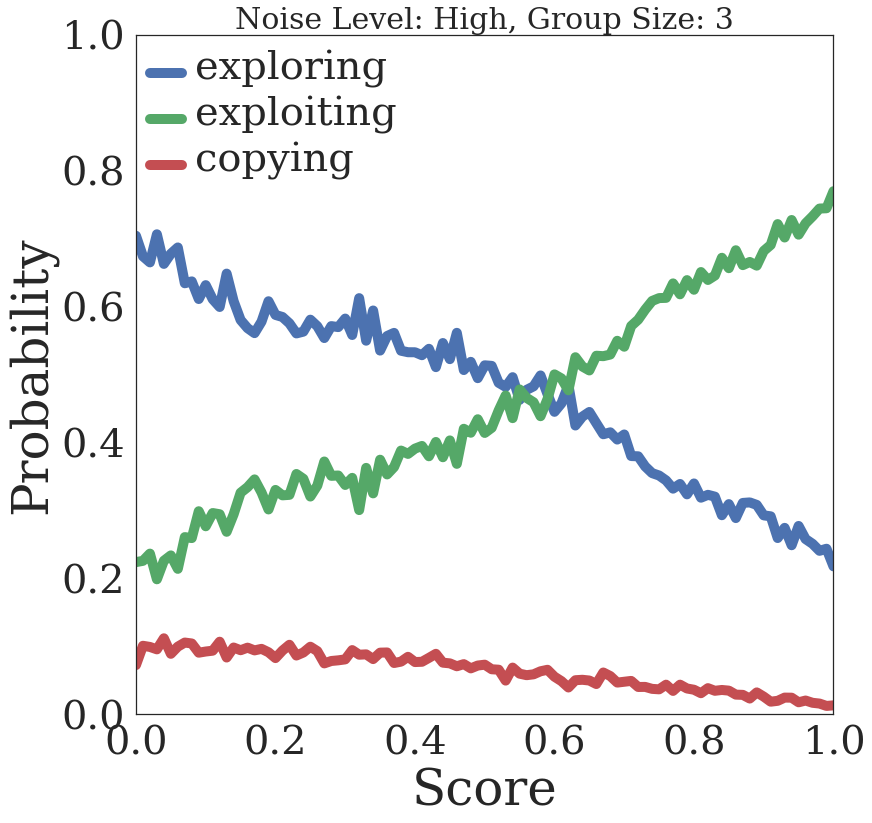

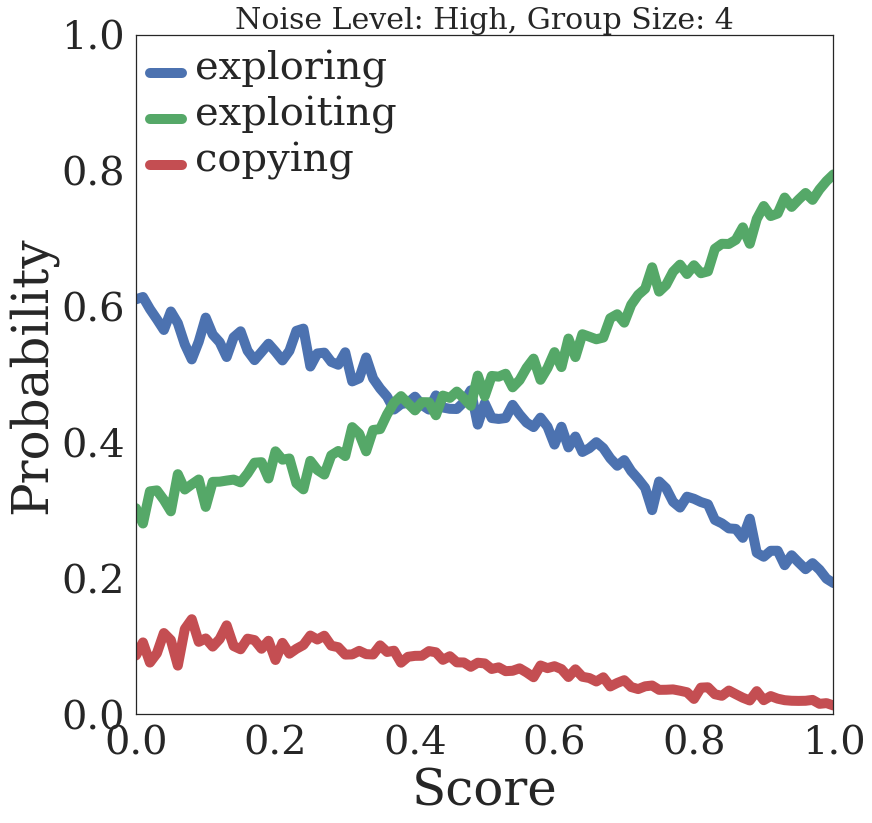

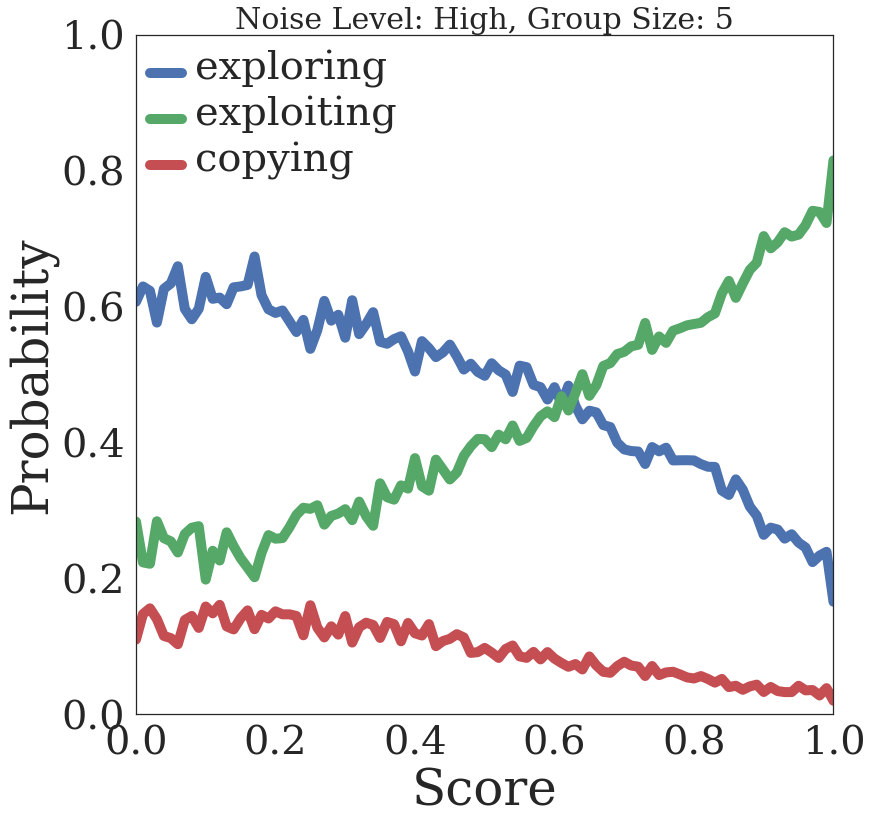

In [23]:
for n in range(2,6):
    score, states = game_utils.get_state_scores(in_dir, subset, n)
    state_analysis(score, states, subset, n)

## High Noise

In [22]:
in_dir = '../../processed/'
subset = '2en01'

In [ ]:
score, states = game_utils.get_state_scores(in_dir, subset)


states as a function of score


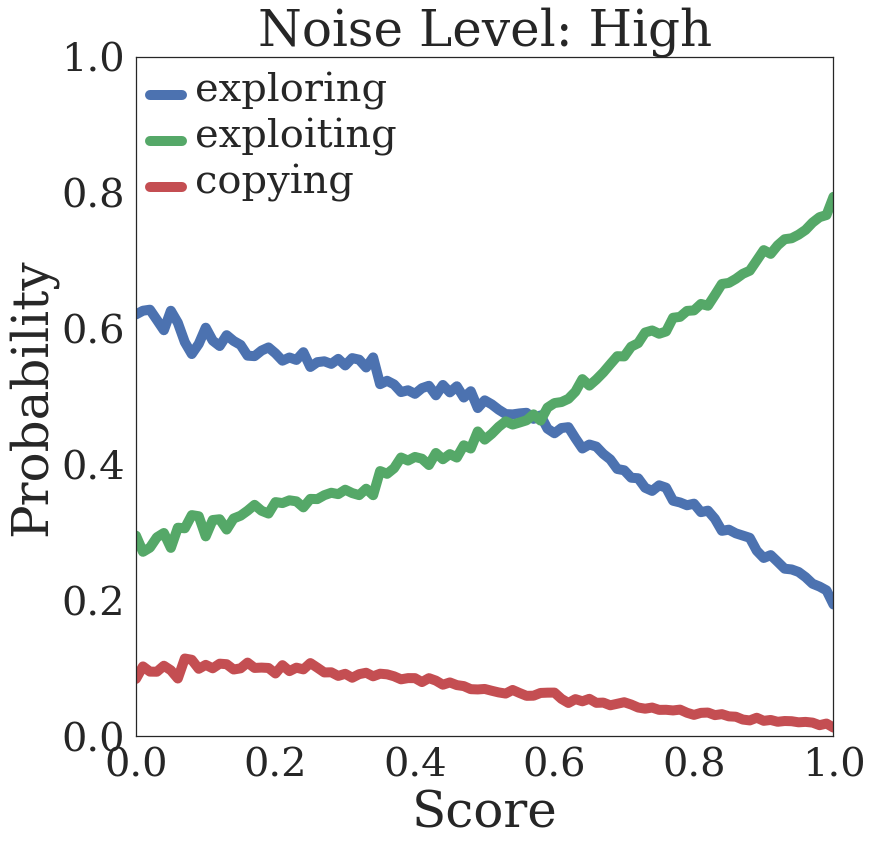

In [12]:
state_analysis(score, states, subset)